In [4]:
import pandas as pd

data = pd.read_csv('adult_with_headers.csv')
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
missing_values = data.isnull().sum()
missing_values

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [16]:
data.dropna(inplace=True)


In [21]:
#Apply Scaling Techniques

from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_features = data.select_dtypes(include = ['int64','float64']).columns

standard_scaler = StandardScaler()
data[numerical_features] = standard_scaler.fit_transform(data[numerical_features])

minmax_scaler = MinMaxScaler()
data[numerical_features] = minmax_scaler.fit_transform(data[numerical_features])

In [25]:
print(data.columns)



Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [27]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_count = data[col].nunique()
    print(f"{col}: {unique_count} unique values")


workclass: 9 unique values
education: 16 unique values
marital_status: 7 unique values
occupation: 15 unique values
relationship: 6 unique values
race: 5 unique values
sex: 2 unique values
native_country: 42 unique values
income: 2 unique values


In [29]:
#Encoding Techiniques

# One-Hot Encoding for categorical variables with less than 5 categories
data_dummies = pd.get_dummies(data, columns=['sex', 'income'], drop_first=True)
data_dummies


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,0.021740,0.0,0.397959,United-States,True,False
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,0.000000,0.0,0.122449,United-States,True,False
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,0.000000,0.0,0.397959,United-States,True,False
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.000000,0.0,0.397959,United-States,True,False
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,0.000000,0.0,0.397959,Cuba,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,0.000000,0.0,0.377551,United-States,False,False
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,0.000000,0.0,0.397959,United-States,True,True
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,0.000000,0.0,0.397959,United-States,False,False
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,0.000000,0.0,0.193878,United-States,True,False


In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Assuming 'categorical_column_3' has more than 5 categories
data['relationship'] = label_encoder.fit_transform(data['relationship'])


In [39]:
#Feature engineering

# 1. Age Groups
data['age_group'] = pd.cut(data['age'], bins=[0, 18, 35, 65, 100], labels=['youth', 'adult', 'senior', 'elderly'])

# 2. Working Hours per Week
median_hours = data['hours_per_week'].median()
data['above_median_hours'] = (data['hours_per_week'] > median_hours).astype(int)


In [37]:
# Check the data type of the income column
import numpy as np

print(data['income'].dtype)
print(data['income'].unique())

# Convert income column to numeric (1 for >50K, 0 for <=50K)
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

data['log_hours_per_week'] = np.log(data['hours_per_week'] + 1)  # Prevent log(0)



object
[' <=50K' ' >50K']


In [41]:
#Feature Selection

from sklearn.ensemble import IsolationForest

# Identify outliers
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed
data['anomaly'] = iso_forest.fit_predict(data[numerical_features])

# Remove outliers
data = data[data['anomaly'] == 1]


In [12]:
print(data.dtypes)



age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
# Convert 'income' to numeric if it's categorical
label_encoder = LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])

# Create a DataFrame with only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Print the sorted correlation values with respect to 'income'
print(correlation_matrix['income'].sort_values(ascending=False))


income            1.000000
education_num     0.335154
age               0.234037
hours_per_week    0.229689
capital_gain      0.223329
capital_loss      0.150526
fnlwgt           -0.009463
Name: income, dtype: float64


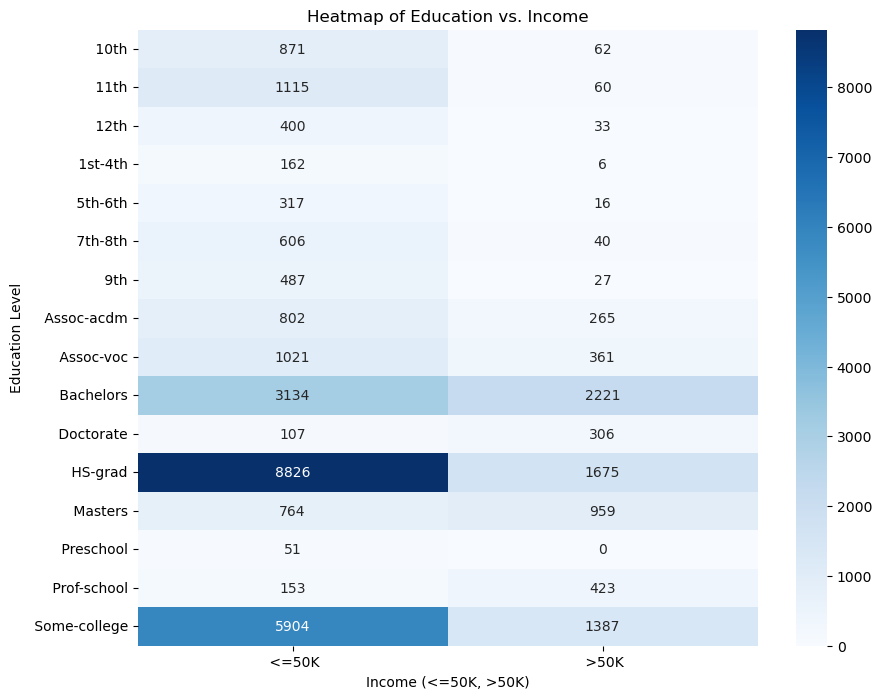

In [17]:
#Visualizations
# Cross-tabulation for a heatmap of education vs. income
edu_income = pd.crosstab(data['education'], data['income'])
plt.figure(figsize=(10, 8))
sns.heatmap(edu_income, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Education vs. Income')
plt.xlabel('Income (<=50K, >50K)')
plt.ylabel('Education Level')
plt.show()



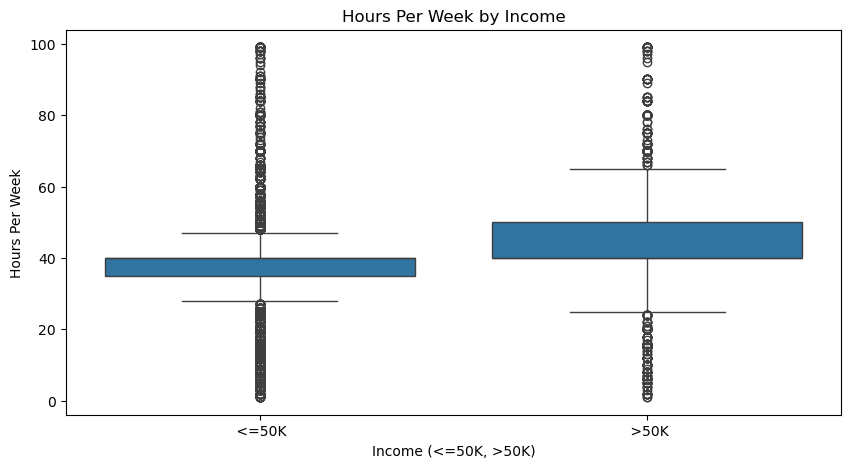

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='income', y='hours_per_week', data=data)
plt.title('Hours Per Week by Income')
plt.xlabel('Income (<=50K, >50K)')
plt.ylabel('Hours Per Week')
plt.show()
